In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [30]:
cleaned_dataset = pd.read_csv('cleaned_dataset.csv')

X = cleaned_dataset.drop('price', axis=1)
y = cleaned_dataset['price']

KeyError: "['price'] not found in axis"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 328089654.35847986
R^2 Score: 0.6574685071128396


In [ ]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                             Coefficient
resolution_height            4461.913918
processor_speed              1357.849521
screen_size                 -2034.461918
internal_memory             13694.344720
resolution_width             5521.138250
primary_camera_front        -2170.304108
rating                      -4573.864063
ram_capacity                 3227.980289
has_nfc                      7076.465746
extended_memory_available   -5918.691113
primary_camera_rear           993.957099
os_ios                       6166.258302
refresh_rate                -2395.022838
has_5g                      -2917.790898
num_rear_cameras             -584.213971
num_cores                    -543.018476
processor_brand_snapdragon   2645.495203


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate Random Forest model
y_pred_rf = rf_model.predict(X_test)
rf_r2_score = r2_score(y_test, y_pred_rf)

print("Random Forest R² Score:", rf_r2_score)


Random Forest R² Score: 0.7479186726265188


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                               n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

best_rf_model = rf_random.best_estimator_


y_pred_best_rf = best_rf_model.predict(X_test)
best_rf_r2_score = r2_score(y_test, y_pred_best_rf)

print("Best Random Forest R² Score:", best_rf_r2_score)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.9s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   2.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   3.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   3.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   2.3s
[CV] END max_depth=40, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END max_depth=40, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END max_depth=40, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END max_depth=40, max_features=N

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
gb_r2_score = r2_score(y_test, y_pred_gb)

print("Gradient Boosting R² Score:", gb_r2_score)


Gradient Boosting R² Score: 0.6368128678048927


Feature ranking:
1. feature 0 (0.12062166836848452)
2. feature 1 (0.11531048862924512)
3. feature 3 (0.10075386358650733)
4. feature 4 (0.09577339727304889)
5. feature 2 (0.09235465886889374)
6. feature 5 (0.0881329363973008)
7. feature 6 (0.06697732750878191)
8. feature 7 (0.05879007117116634)
9. feature 8 (0.053948543991734925)
10. feature 9 (0.04560598158840308)
11. feature 10 (0.0351845335959151)
12. feature 13 (0.030187264050462414)
13. feature 11 (0.027400098165004497)
14. feature 12 (0.024603562727046002)
15. feature 14 (0.016358761682629026)
16. feature 16 (0.015361208390441835)
17. feature 15 (0.012635634004934462)


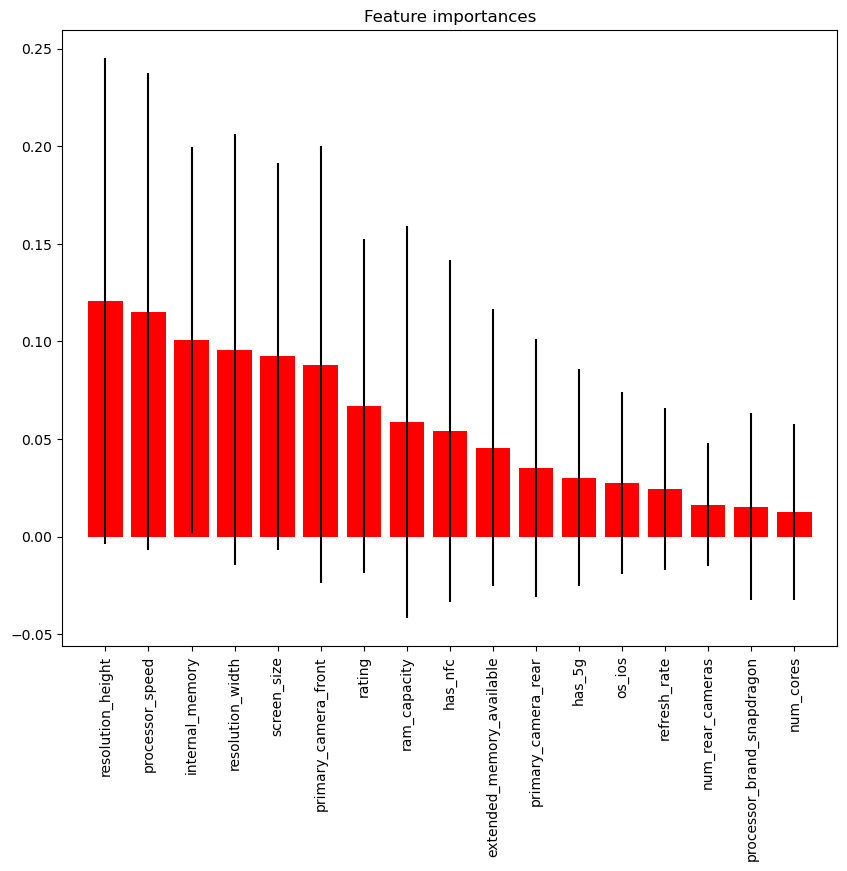

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = best_rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_rf_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")

plt.figure(figsize=(10, 8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [ ]:
import pickle


with open('best_rf_model.pb','wb') as f:    
    pickle.dump(best_rf_model, f)

In [ ]:
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   resolution_height           980 non-null    float64
 1   processor_speed             980 non-null    float64
 2   screen_size                 980 non-null    float64
 3   internal_memory             980 non-null    float64
 4   resolution_width            980 non-null    float64
 5   primary_camera_front        980 non-null    float64
 6   rating                      980 non-null    float64
 7   ram_capacity                980 non-null    float64
 8   has_nfc                     980 non-null    float64
 9   extended_memory_available   980 non-null    float64
 10  primary_camera_rear         980 non-null    float64
 11  os_ios                      980 non-null    float64
 12  refresh_rate                980 non-null    float64
 13  has_5g                      980 non